In [68]:
# importing libraries and data set(Kaggle data set )
import numpy as np 
import pandas as pd
data = pd.read_csv('train (1).csv')
data['date'] = pd.to_datetime(data['date'])
data.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [69]:
data = data.set_index('date')

## making new data frame 

In [70]:
# creating new dataframe from price column
data_price = data[['price']]
# inserting new column with yesterday's price values
data_price.loc[:,'Yesterday'] = data_price.loc[:,'price'].shift()
# inserting another column with difference between yesterday and day before yesterday's price values.
data_price.loc[:,'Yesterday_Diff'] = data_price.loc[:,'Yesterday'].diff()
# dropping NAs
data_price = data_price.dropna()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [71]:
data_price

,price,Yesterday,Yesterday_Diff
date,,,
2012-01-31,0.87,2.86,1.90
2012-01-31,1.00,0.87,-1.99
2012-01-31,0.39,1.00,0.13
2012-01-31,1.00,0.39,-0.61
2012-01-31,0.43,1.00,0.61
...,...,...,...
2017-12-31,1.02,0.51,0.25
2017-12-31,0.47,1.02,0.51
2017-12-31,1.02,0.47,-0.55


## Using forward chain method , defining the test and train data set

In [54]:
# Defining test and train data 1 split
X_train = data_price[:'2016'].drop(['price'], axis = 1)
y_train = data_price.loc[:'2016', 'price']
X_test = data_price['2017'].drop(['price'], axis = 1)
y_test = data_price.loc['2017', 'price']

C:\Users\DELL\AppData\Local\Temp/ipykernel_7208/2445221070.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_price['2017'].drop(['price'], axis = 1)


In [72]:
train.shape

(5398, 3)

In [73]:
test.shape

(1080, 3)

### Spliting the data , since I have a data from 2012 - 2017 , the split in data will be 4 for 5 years in training  data set

### Checking on different model can comparing there value

LR: 0.013260 (0.004909)


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERAT

NN: 0.093692 (0.057017)
KNN: -0.068863 (0.073461)
RF: -0.214668 (0.098795)
SVR: 0.049162 (0.031450)


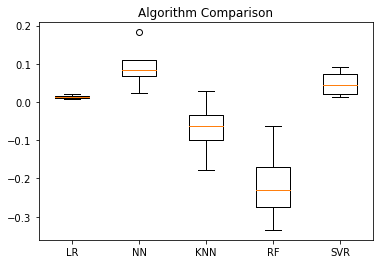

In [74]:
from sklearn.model_selection import TimeSeriesSplit
# Spot Check Algorithms
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear


#Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=4)
    v_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    results.append(v_results)
    names.append(name)
    print('%s: %f (%f)' % (name, v_results.mean(), v_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

### Creating  Helper function for printing the performence  

In [75]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [76]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [63]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [77]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.0938
mean_squared_log_error:  0.0971
r2:  0.0873
MAE:  0.5677
MSE:  0.6092
RMSE:  0.7805


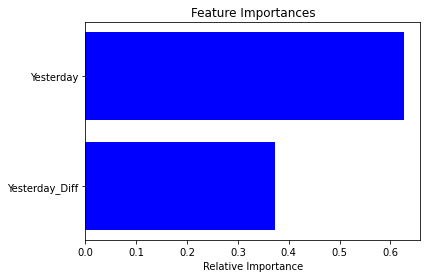

In [78]:
imp = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Creating anothe dataframe and training date (t-2) for t date prediction

In [79]:
# creating copy of original dataframe
data_price_2o = data_price.copy()
# inserting column with yesterday-1 values
data_price_2o['Yesterday-1'] = data_price_2o['Yesterday'].shift()
# inserting column with difference in yesterday-1 and yesterday-2 values.
data_price_2o['Yesterday-1_Diff'] = data_price_2o['Yesterday-1'].diff()
# dropping NAs
data_price_2o = data_price_2o.dropna()

In [80]:
data_price_2o

,price,Yesterday,Yesterday_Diff,Yesterday-1,Yesterday-1_Diff
date,,,,,
2012-01-31,0.39,1.00,0.13,0.87,-1.99
2012-01-31,1.00,0.39,-0.61,1.00,0.13
2012-01-31,0.43,1.00,0.61,0.39,-0.61
2012-01-31,0.49,0.43,-0.57,1.00,0.61
2012-01-31,0.70,0.49,0.06,0.43,-0.57
...,...,...,...,...,...
2017-12-31,1.02,0.51,0.25,0.26,-2.19
2017-12-31,0.47,1.02,0.51,0.51,0.25
2017-12-31,1.02,0.47,-0.55,1.02,0.51


In [81]:
# resetting test and train data 
X_train_2o = data_price_2o[:'2016'].drop(['price'], axis = 1)
y_train_2o = data_price_2o.loc[:'2016', 'price']
X_test = data_price_2o['2017'].drop(['price'], axis = 1)
y_test = data_price_2o.loc['2017', 'price']

C:\Users\DELL\AppData\Local\Temp/ipykernel_7208/3588368293.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  X_test = data_price_2o['2017'].drop(['price'], axis = 1)


In [82]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = rmse_score)
gsearch.fit(X_train_2o, y_train_2o)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [83]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.1295
mean_squared_log_error:  0.0926
r2:  0.1236
MAE:  0.5454
MSE:  0.5849
RMSE:  0.7648


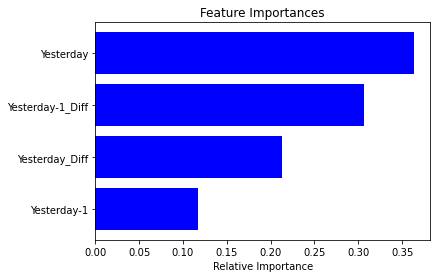

In [84]:
imp = best_model.feature_importances_
features = X_train_2o.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()